### Import and webdriver setup

In [6]:
!pip install wordcloud


In [1]:
#C:/Users/grema/Jupyter python stuff/PlayStoreScraper/chromedriver.exe
#C:/Users/jackie.yu/Documents/WeCloudData/Python/PlayStoreProject/PlayStoreScraper/chromedriver.exe

In [7]:
import re
import random
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from collections import Counter
from time import sleep
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grema\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grema\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [10]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('/Users/grema/Jupyter python stuff/PlayStoreScraper/chromedriver.exe')
#driver.get("https://play.google.com/store/apps/details?id=todolist.scheduleplanner.dailyplanner.todo.reminders&showAllReviews=true")

### Parsing through the html with Selenium

In [11]:
# Expands the "Read more" button for reviews and scrolls
def review_scroller(url, iterations):
    driver.get(url)
    for _ in range(iterations):   
        button_list = driver.find_elements_by_css_selector("button[jsname='gxjVle']")
        for button in button_list:
            driver.execute_script("arguments[0].click();", button)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-60);")
        sleep(2)
        try:
            driver.find_element_by_class_name("U26fgb.O0WRkf.oG5Srb.C0oVfc.n9lfJ.M9Bg4d").click()
        except:
            pass

In [13]:
def info_collector(url):
    review_scroller(url, 11)
    
    list_of_reviews = driver.find_elements_by_css_selector("span[jsname='bN97Pc']")
    review_dict = {}
    for i, review in enumerate(list_of_reviews):
        review_dict[i] = review.text

    list_of_reviews2 = driver.find_elements_by_css_selector("span[jsname='fbQN7e']")
    expanded_review_dict = {}
    for i, review in enumerate(list_of_reviews2):
        expanded_review_dict[i] = review.text

    for i in review_dict:
        if review_dict[i] == '':
            review_dict[i] = expanded_review_dict[i]
            
    category = driver.find_element_by_css_selector("a[itemprop = 'genre']").get_attribute("href")[44:]
    category_dict = {i:category for i in range(len(review_dict))}
    
    title = driver.find_element_by_tag_name("h1").text
    title_dict = {i:title for i in range(len(review_dict))}

    #filters out developer responses
    list_of_users = driver.find_elements_by_class_name("bAhLNe.kx8XBd")
    #finds date that review is posted and stores it as a datetime object
    list_of_dates = [user.find_elements_by_class_name('p2TkOb')[0].text for user in list_of_users]

    date_dict = {}

    for i, date in enumerate(list_of_dates):
        date_dict[i] = datetime.strptime(date, '%B %d, %Y')
        #date_dict[i].strftime('%Y-%m-%d') to convert back to string

    #finds how many likes a review has, no likes will be defaulted to 0
    list_of_likes = driver.find_elements_by_class_name('jUL89d.y92BAb')
    like_dict = {}

    for i, like in enumerate(list_of_likes):
        if like.text == '':
            like_dict[i] = 0
        else:
            like_dict[i] = int(like.text)

    # Parent class containing the star review
    star_parent_class = driver.find_elements_by_class_name("pf5lIe")
    # Child class containing the string star rating e.g. "Rated 5 stars out of five stars"
    list_of_stars = [parent.find_element_by_css_selector("div").get_attribute("aria-label") for parent in star_parent_class]
    star_dict = {}

    for i, star in enumerate(list_of_stars):
        # Retrieving reviews that do not have a float value 
        # as these come from the recommended apps on the bottom
        if not re.search('(\d\.\d)', star):        
            star_dict[i-1] = int(re.search('[0-5]', star).group())

            
    
    return_list = [title_dict, category_dict, date_dict, star_dict, review_dict, like_dict]
    return return_list

### Forest data

In [14]:
forest_list = info_collector('https://play.google.com/store/apps/details?id=cc.forestapp&hl=en_CA&gl=US&showAllReviews=true')
forest_list

[{0: 'Forest: Stay focused',
  1: 'Forest: Stay focused',
  2: 'Forest: Stay focused',
  3: 'Forest: Stay focused',
  4: 'Forest: Stay focused',
  5: 'Forest: Stay focused',
  6: 'Forest: Stay focused',
  7: 'Forest: Stay focused',
  8: 'Forest: Stay focused',
  9: 'Forest: Stay focused',
  10: 'Forest: Stay focused',
  11: 'Forest: Stay focused',
  12: 'Forest: Stay focused',
  13: 'Forest: Stay focused',
  14: 'Forest: Stay focused',
  15: 'Forest: Stay focused',
  16: 'Forest: Stay focused',
  17: 'Forest: Stay focused',
  18: 'Forest: Stay focused',
  19: 'Forest: Stay focused',
  20: 'Forest: Stay focused',
  21: 'Forest: Stay focused',
  22: 'Forest: Stay focused',
  23: 'Forest: Stay focused',
  24: 'Forest: Stay focused',
  25: 'Forest: Stay focused',
  26: 'Forest: Stay focused',
  27: 'Forest: Stay focused',
  28: 'Forest: Stay focused',
  29: 'Forest: Stay focused',
  30: 'Forest: Stay focused',
  31: 'Forest: Stay focused',
  32: 'Forest: Stay focused',
  33: 'Forest: Stay 

### Google calendar

In [15]:
google_calendar_list = info_collector('https://play.google.com/store/apps/details?id=com.google.android.calendar&showAllReviews=true')

### Genshin Impact

In [16]:
genshin_list = info_collector('https://play.google.com/store/apps/details?id=com.miHoYo.GenshinImpact&hl=en_CA&gl=US&showAllReviews=true')
genshin_list

[{0: 'Genshin Impact',
  1: 'Genshin Impact',
  2: 'Genshin Impact',
  3: 'Genshin Impact',
  4: 'Genshin Impact',
  5: 'Genshin Impact',
  6: 'Genshin Impact',
  7: 'Genshin Impact',
  8: 'Genshin Impact',
  9: 'Genshin Impact',
  10: 'Genshin Impact',
  11: 'Genshin Impact',
  12: 'Genshin Impact',
  13: 'Genshin Impact',
  14: 'Genshin Impact',
  15: 'Genshin Impact',
  16: 'Genshin Impact',
  17: 'Genshin Impact',
  18: 'Genshin Impact',
  19: 'Genshin Impact',
  20: 'Genshin Impact',
  21: 'Genshin Impact',
  22: 'Genshin Impact',
  23: 'Genshin Impact',
  24: 'Genshin Impact',
  25: 'Genshin Impact',
  26: 'Genshin Impact',
  27: 'Genshin Impact',
  28: 'Genshin Impact',
  29: 'Genshin Impact',
  30: 'Genshin Impact',
  31: 'Genshin Impact',
  32: 'Genshin Impact',
  33: 'Genshin Impact',
  34: 'Genshin Impact',
  35: 'Genshin Impact',
  36: 'Genshin Impact',
  37: 'Genshin Impact',
  38: 'Genshin Impact',
  39: 'Genshin Impact',
  40: 'Genshin Impact',
  41: 'Genshin Impact',
  

### Pokemon GO

In [17]:
pokemon_list = info_collector('https://play.google.com/store/apps/details?id=com.nianticlabs.pokemongo&showAllReviews=true')
pokemon_list

[{0: 'Pok√©mon GO',
  1: 'Pok√©mon GO',
  2: 'Pok√©mon GO',
  3: 'Pok√©mon GO',
  4: 'Pok√©mon GO',
  5: 'Pok√©mon GO',
  6: 'Pok√©mon GO',
  7: 'Pok√©mon GO',
  8: 'Pok√©mon GO',
  9: 'Pok√©mon GO',
  10: 'Pok√©mon GO',
  11: 'Pok√©mon GO',
  12: 'Pok√©mon GO',
  13: 'Pok√©mon GO',
  14: 'Pok√©mon GO',
  15: 'Pok√©mon GO',
  16: 'Pok√©mon GO',
  17: 'Pok√©mon GO',
  18: 'Pok√©mon GO',
  19: 'Pok√©mon GO',
  20: 'Pok√©mon GO',
  21: 'Pok√©mon GO',
  22: 'Pok√©mon GO',
  23: 'Pok√©mon GO',
  24: 'Pok√©mon GO',
  25: 'Pok√©mon GO',
  26: 'Pok√©mon GO',
  27: 'Pok√©mon GO',
  28: 'Pok√©mon GO',
  29: 'Pok√©mon GO',
  30: 'Pok√©mon GO',
  31: 'Pok√©mon GO',
  32: 'Pok√©mon GO',
  33: 'Pok√©mon GO',
  34: 'Pok√©mon GO',
  35: 'Pok√©mon GO',
  36: 'Pok√©mon GO',
  37: 'Pok√©mon GO',
  38: 'Pok√©mon GO',
  39: 'Pok√©mon GO',
  40: 'Pok√©mon GO',
  41: 'Pok√©mon GO',
  42: 'Pok√©mon GO',
  43: 'Pok√©mon GO',
  44: 'Pok√©mon GO',
  45: 'Pok√©mon GO',
  46: 'Pok√©mon GO',
  47: 'Pok√©mon GO',
  

### Instagram

In [18]:
insta_list = info_collector('https://play.google.com/store/apps/details?id=com.instagram.android&hl=en_CA&gl=US&showAllReviews=true')
insta_list

[{0: 'Instagram',
  1: 'Instagram',
  2: 'Instagram',
  3: 'Instagram',
  4: 'Instagram',
  5: 'Instagram',
  6: 'Instagram',
  7: 'Instagram',
  8: 'Instagram',
  9: 'Instagram',
  10: 'Instagram',
  11: 'Instagram',
  12: 'Instagram',
  13: 'Instagram',
  14: 'Instagram',
  15: 'Instagram',
  16: 'Instagram',
  17: 'Instagram',
  18: 'Instagram',
  19: 'Instagram',
  20: 'Instagram',
  21: 'Instagram',
  22: 'Instagram',
  23: 'Instagram',
  24: 'Instagram',
  25: 'Instagram',
  26: 'Instagram',
  27: 'Instagram',
  28: 'Instagram',
  29: 'Instagram',
  30: 'Instagram',
  31: 'Instagram',
  32: 'Instagram',
  33: 'Instagram',
  34: 'Instagram',
  35: 'Instagram',
  36: 'Instagram',
  37: 'Instagram',
  38: 'Instagram',
  39: 'Instagram',
  40: 'Instagram',
  41: 'Instagram',
  42: 'Instagram',
  43: 'Instagram',
  44: 'Instagram',
  45: 'Instagram',
  46: 'Instagram',
  47: 'Instagram',
  48: 'Instagram',
  49: 'Instagram',
  50: 'Instagram',
  51: 'Instagram',
  52: 'Instagram',
  5

### Tiktok

In [19]:
tiktok_list = info_collector('https://play.google.com/store/apps/details?id=com.zhiliaoapp.musically&showAllReviews=true')
tiktok_list

[{0: 'TikTok',
  1: 'TikTok',
  2: 'TikTok',
  3: 'TikTok',
  4: 'TikTok',
  5: 'TikTok',
  6: 'TikTok',
  7: 'TikTok',
  8: 'TikTok',
  9: 'TikTok',
  10: 'TikTok',
  11: 'TikTok',
  12: 'TikTok',
  13: 'TikTok',
  14: 'TikTok',
  15: 'TikTok',
  16: 'TikTok',
  17: 'TikTok',
  18: 'TikTok',
  19: 'TikTok',
  20: 'TikTok',
  21: 'TikTok',
  22: 'TikTok',
  23: 'TikTok',
  24: 'TikTok',
  25: 'TikTok',
  26: 'TikTok',
  27: 'TikTok',
  28: 'TikTok',
  29: 'TikTok',
  30: 'TikTok',
  31: 'TikTok',
  32: 'TikTok',
  33: 'TikTok',
  34: 'TikTok',
  35: 'TikTok',
  36: 'TikTok',
  37: 'TikTok',
  38: 'TikTok',
  39: 'TikTok',
  40: 'TikTok',
  41: 'TikTok',
  42: 'TikTok',
  43: 'TikTok',
  44: 'TikTok',
  45: 'TikTok',
  46: 'TikTok',
  47: 'TikTok',
  48: 'TikTok',
  49: 'TikTok',
  50: 'TikTok',
  51: 'TikTok',
  52: 'TikTok',
  53: 'TikTok',
  54: 'TikTok',
  55: 'TikTok',
  56: 'TikTok',
  57: 'TikTok',
  58: 'TikTok',
  59: 'TikTok',
  60: 'TikTok',
  61: 'TikTok',
  62: 'TikTok',
  

### Panda panda panda

In [20]:
# title_dict, category_dict, date_dict, star_dict, review_dict, like_dict
forest_df = pd.DataFrame(forest_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
google_calendar_df = pd.DataFrame(google_calendar_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
genshin_df = pd.DataFrame(genshin_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
pokemon_df = pd.DataFrame(pokemon_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
insta_df = pd.DataFrame(insta_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
tiktok_df = pd.DataFrame(tiktok_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()

In [21]:
data_df = pd.concat([forest_df, google_calendar_df, genshin_df, pokemon_df, insta_df, tiktok_df])
data_df = data_df.reset_index(drop= True)

In [22]:
data_df['Stars'] = data_df['Stars'].astype(np.int64)
data_df['Likes'] = data_df['Likes'].astype(np.int64)

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     3600 non-null   object        
 1   Category  3600 non-null   object        
 2   Date      3600 non-null   datetime64[ns]
 3   Stars     3600 non-null   int64         
 4   Review    3600 non-null   object        
 5   Likes     3600 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 168.9+ KB


### Average number of stars per category

In [67]:
data_df.groupby('Category')['Stars'].mean()

Category
GAME_ADVENTURE    3.095833
PRODUCTIVITY      3.296667
SOCIAL            2.613333
Name: Stars, dtype: float64

### Average number of stars per star rating per category

In [78]:
data_df.groupby(['Category', 'Stars'])['Stars'].count()

Category        Stars
GAME_ADVENTURE  1        299
                2        138
                3        214
                4        247
                5        302
PRODUCTIVITY    1        279
                2        145
                3        159
                4        175
                5        442
SOCIAL          1        473
                2        172
                3        167
                4        122
                5        266
Name: Stars, dtype: int64

In [76]:
data2.groupby('Stars').mean()

Stars
1    350.333333
2    151.666667
3    180.000000
4    181.333333
5    336.666667
Name: Stars, dtype: float64

In [ ]:
# Bar chart with x-axis separated on category and then stars. Subplots needed maybe??
#fig, axs = plt.subplots(1,2);


labels = data_df['Category'].unique()
one_star = data2.values[0::5]
two_star = data2.values[1::5]
three_star = data2.values[2::5]
four_star = data2.values[3::5]
five_star = data2.values[4::5]

x = np.arange(len(labels));
width = 0.15;

fig, axs = plt.subplots();
#plt.figure(figsize=(9,5));

rects1 = plt.bar(x + 0.0, one_star, width, label = 'One Star');
rects2 = plt.bar(x + 0.2, two_star, width, label = 'Two Stars');
rects3 = plt.bar(x + 0.4, three_star, width, label = 'Three Stars');
rects4 = plt.bar(x + 0.6, four_star, width, label = 'Four Stars');
rects5 = plt.bar(x + 0.8, five_star, width, label = 'Five Stars');

axs.set_xticks(x);
axs.set_xticklabels(labels);
axs.set_ylabel('Scores');
axs.set_title('Scores by group and gender');
axs.set_xticks(x);
axs.set_xticklabels(labels);



fig.tight_layout();
#plt.savefig('buw.png');

### Words most common in a star review

In [88]:
text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)


['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [23]:
tokenized_words = {}

new_stopwords = stopwords.words() + ['I', ',', "n't", '!', "'", 'For',\
                                     ".", "It'", 'It', '-', "'ll", "'m",\
                                     "'s", '/', "My", 'The', "'ve", 'So',\
                                     'A', 'This', ')', '(', '?', ':', ';',\
                                     'But', 'though', "'re"]    

for i, review in enumerate(data_df["Review"]):
    text_tokens = word_tokenize(review)
    tokens_without_sw = [word for word in text_tokens if not word in new_stopwords]
    tokenized_words[i] = ' '.join(tokens_without_sw)
    


In [182]:
tokenized_words

{0: 'put words much app provides needs actions By upgrading plus able plant real trees comfort home indeed worth affordable sustainable well creators great job using app 3 years failed since Suggestion create extension works like momentum timer chrome go away click Thanks',
 1: 'Super cute helpful helping studying since started using lot time even go time set love seeing little trees grow working hard Having reminders helps get back study mode really love app',
 2: 'like app find useful concentrating specific tasks designated period time virtual tree grows satisfying see forest garden day problem app selection plants choose great recent ones nice lot detail earlier ones quite cartoonish unappealing',
 3: 'using Forest since 2015 definitely helps prevent mindless usage distracting apps consider paying premium perks every often thank developers many hours productivity app helped achieve paid One feature found wanting lately would custom app whitelists tied activity selected work activity

In [24]:
token = pd.DataFrame([tokenized_words], index=['TokenReview']).transpose()

data_df = pd.concat([data_df, token], axis=1)


In [25]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-14      5   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-11      4   
3     Forest: Stay focused  PRODUCTIVITY 2021-10-15      5   
4     Forest: Stay focused  PRODUCTIVITY 2021-10-17      5   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-10      5   
3596                TikTok        SOCIAL 2021-10-10      5   
3597                TikTok        SOCIAL 2021-10-04      3   
3598                TikTok        SOCIAL 2021-10-04      1   
3599                TikTok        SOCIAL 2021-10-12      5   

                                                 Review  Likes  \
0     I can't put into words how much this app provi...     57   
1     Super cute and helpful! This has been helping ...     86   
2     I like this app and find it useful for concent...     47   
3     I've been using Forest since 2015 and it defin...     43   
4     so many bugs...so many bugs...even in pro vers...      2   
...                                                 ...    ...   
3595  This is the best app ever,you can scroll non-s...      8   
3596  Based on the fact I don't see myself as photog...      3   
3597  Well this app is good the only problem I have ...      2   
3598  This app is so good so it deserves a 5 star bu...     18   
3599  This is such a nice app and so many ways to sp...      1   

                                            TokenReview  
0     put words much app provides needs actions By u...  
1     Super cute helpful helping studying since star...  
2     like app find useful concentrating specific ta...  
3     using Forest since 2015 definitely helps preve...  
4     many bugs ... many bugs ... even pro version i...  
...                                                 ...  
3595  best app ever scroll non-stop amazing people s...  
3596  Based fact see photogenic personally really en...  
3597  Well app good problem send direct messages mak...  
3598  app good deserves 5 star reason giving 4 star ...  
3599  nice app many ways sport favourite creature go...  

[3600 rows x 7 columns]

In [26]:
data_df.groupby('Stars')['TokenReview'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))[5]

[('app', 716),
 ('game', 540),
 ('like', 276),
 ('love', 269),
 ('really', 253),
 ('get', 203),
 ('time', 190),
 ('good', 188),
 ('great', 176),
 ('fun', 150),
 ('people', 134),
 ('amazing', 130),
 ('focus', 126),
 ('much', 125),
 ('...', 118),
 ('use', 113),
 ('one', 112),
 ('would', 111),
 ('work', 110),
 ('best', 109),
 ('phone', 108),
 ('play', 106),
 ('make', 104),
 ('even', 94),
 ('many', 81),
 ('videos', 80),
 ('see', 79),
 ('trees', 78),
 ('helps', 77),
 ('using', 76),
 ('way', 76),
 ('think', 76),
 ('lot', 75),
 ('things', 75),
 ('new', 75),
 ('characters', 75),
 ('keep', 74),
 ('recommend', 71),
 ('5', 71),
 ('playing', 71),
 ('still', 69),
 ('Love', 65),
 ('go', 64),
 ('free', 62),
 ('know', 61),
 ('need', 60),
 ('story', 60),
 ('study', 59),
 ('day', 59),
 ('focused', 59),
 ('studying', 58),
 ('could', 58),
 ('..', 58),
 ('friends', 58),
 ('give', 57),
 ('nice', 56),
 ('better', 55),
 ('apps', 54),
 ('ever', 54),
 ('help', 54),
 ('thing', 52),
 ('well', 50),
 ('version', 50

In [202]:
data_df.groupby(['Stars','Category'])['TokenReview'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))

Stars  Category      
1      GAME_ADVENTURE    [(game, 359), (play, 103), (get, 87), (even, 8...
       PRODUCTIVITY      [(calendar, 136), (app, 124), (update, 109), (...
       SOCIAL            [(app, 432), (account, 180), (Instagram, 149),...
2      GAME_ADVENTURE    [(game, 184), (get, 45), (even, 38), (play, 36...
       PRODUCTIVITY      [(app, 81), (calendar, 70), (widget, 40), (upd...
       SOCIAL            [(app, 162), (account, 58), (Instagram, 54), (...
3      GAME_ADVENTURE    [(game, 268), (get, 69), (like, 66), (really, ...
       PRODUCTIVITY      [(app, 82), (calendar, 51), (..., 39), (Google...
       SOCIAL            [(app, 151), (like, 55), (account, 47), (good,...
4      GAME_ADVENTURE    [(game, 370), (get, 93), (like, 85), (good, 65...
       PRODUCTIVITY      [(app, 167), (time, 45), (good, 40), (use, 39)...
       SOCIAL            [(app, 107), (like, 42), (good, 38), (videos, ...
5      GAME_ADVENTURE    [(game, 533), (love, 105), (play, 98), (get, 9...
   

In [104]:
stopwords2 = set(STOPWORDS)
stopwords2.update(['game', 'app', 'Instagram', 'Forest', 'Pokemon', 'Go', 'Genshin', 'Impact', 'TikTok', 'calendar'])

In [112]:
def word_cloud_maker(title, star_num):
    title_df = data_df[data_df['Title']==title]
    text = ' '.join(review for review in title_df[title_df['Stars'] == star_num]['TokenReview'])
    wordcloud = WordCloud(stopwords=stopwords2, max_font_size=60, background_color='white', colormap='twilight').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title}: {star_num} star review wordcloud")
    plt.show()

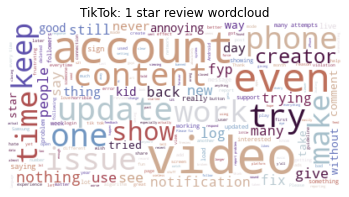

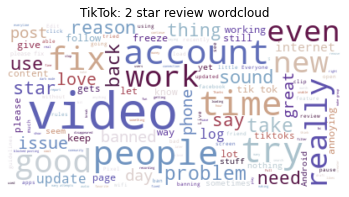

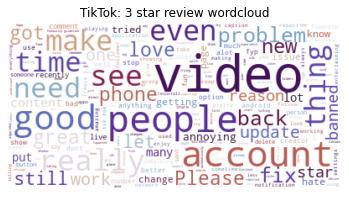

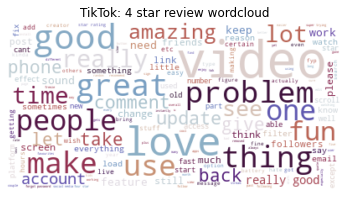

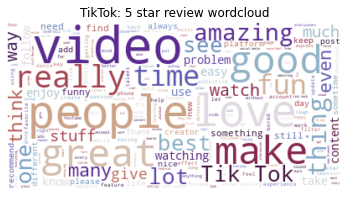

In [113]:
for i in [1,2,3,4,5]:
    word_cloud_maker('TikTok', i)

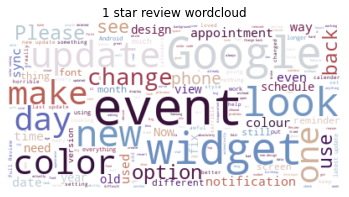

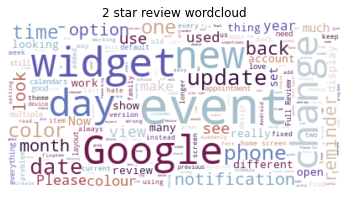

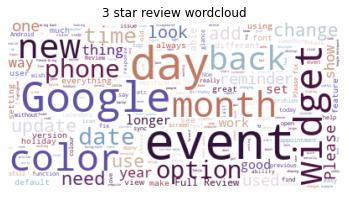

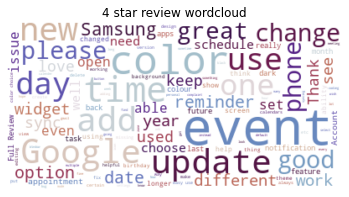

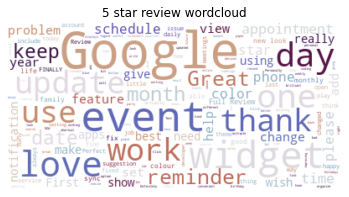

In [109]:
for i in [1,2,3,4,5]:
    word_cloud_maker('Google Calendar', i)

### Stars over a period

In [251]:
data_df['Title'].unique()

array(['Forest: Stay focused', 'Google Calendar', 'Genshin Impact',
       'Pok√©mon GO', 'Instagram', 'TikTok'], dtype=object)

In [117]:
def stars_over_date(title):
    title_df = data_df[data_df['Title'] == title]
    title_df = title_df[['Title','Date' ,'Stars']]
    title_df = title_df.sort_values('Date')
    plt.figure(figsize=(9,5))
    plt.plot(title_df['Date'].unique(), title_df.groupby('Date')['Stars'].mean())
    plt.title(f'{title}: Star rating over date range' )

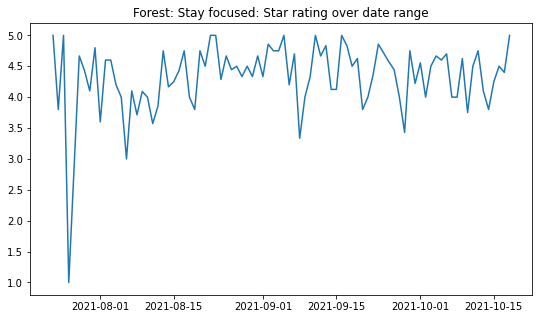

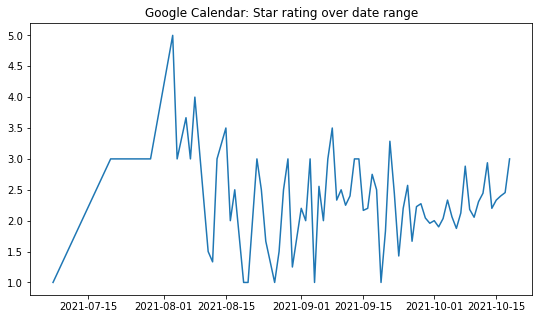

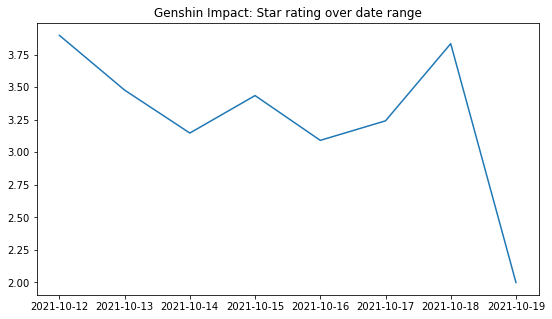

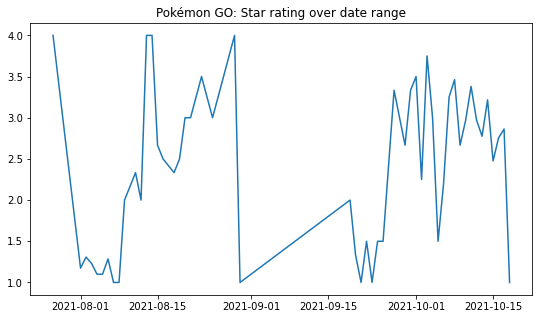

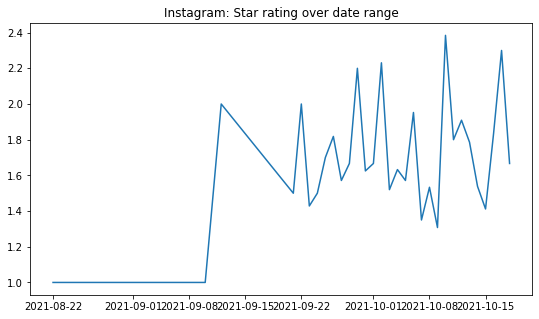

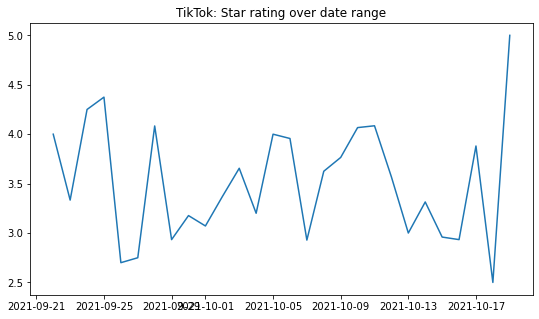

In [118]:
for title in data_df['Title'].unique():
    stars_over_date(title)

### Likes stars average

In [121]:
like_star_avg = data_df.groupby('Stars')['Likes'].mean()

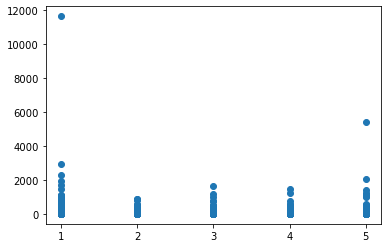

In [133]:
plt.plot(data_df['Stars'], data_df['Likes'], 'o' )
plt.xticks(np.arange(min(data_df['Stars']), max(data_df['Stars'])+1, 1.0));

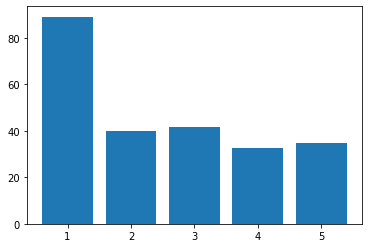

In [130]:
plt.bar([1,2,3,4,5], like_star_avg);


In [267]:
data_df[['Stars', 'Likes', 'Title']].sort_values('Likes')

Stars  Likes           Title
1799      4      0  Genshin Impact
1212      5      0  Genshin Impact
3310      5      0          TikTok
1227      4      0  Genshin Impact
1241      3      0  Genshin Impact
...     ...    ...             ...
2853      5   2072       Instagram
3193      1   2313          TikTok
3144      1   2914          TikTok
3018      5   5411          TikTok
3254      1  11645          TikTok

[3600 rows x 3 columns]

In [134]:
review_len = {i: len(review) for i, review in enumerate(data_df['Review'])}

In [135]:
length = pd.DataFrame([review_len], index=['ReviewLen']).transpose()

data_df = pd.concat([data_df, length], axis=1)

In [136]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-14      5   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-11      4   
3     Forest: Stay focused  PRODUCTIVITY 2021-10-15      5   
4     Forest: Stay focused  PRODUCTIVITY 2021-10-17      5   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-10      5   
3596                TikTok        SOCIAL 2021-10-10      5   
3597                TikTok        SOCIAL 2021-10-04      3   
3598                TikTok        SOCIAL 2021-10-04      1   
3599                TikTok        SOCIAL 2021-10-12      5   

                                                 Review  Likes  \
0     I can't put into words how much this app provi...     57   
1     Super cute and helpful! This has been helping ...     86   
2     I like this app and find it useful for concent...     47   
3     I've been using Forest since 2015 and it defin...     43   
4     so many bugs...so many bugs...even in pro vers...      2   
...                                                 ...    ...   
3595  This is the best app ever,you can scroll non-s...      8   
3596  Based on the fact I don't see myself as photog...      3   
3597  Well this app is good the only problem I have ...      2   
3598  This app is so good so it deserves a 5 star bu...     18   
3599  This is such a nice app and so many ways to sp...      1   

                                            TokenReview  ReviewLen  
0     put words much app provides needs actions By u...        447  
1     Super cute helpful helping studying since star...        305  
2     like app find useful concentrating specific ta...        407  
3     using Forest since 2015 definitely helps preve...        479  
4     many bugs ... many bugs ... even pro version i...        206  
...                                                 ...        ...  
3595  best app ever scroll non-stop amazing people s...        134  
3596  Based fact see photogenic personally really en...        299  
3597  Well app good problem send direct messages mak...        248  
3598  app good deserves 5 star reason giving 4 star ...        180  
3599  nice app many ways sport favourite creature go...        108  

[3600 rows x 8 columns]

### Length of review relative to stars

<BarContainer object of 5 artists>

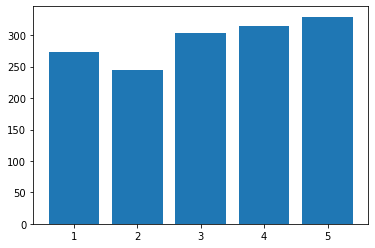

In [155]:
plt.bar(data_df['Stars'].unique(), data_df.groupby(['Stars'])['ReviewLen'].mean())